In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data

In [65]:
# Import dataset
file_path = "../Stroke_Prediction_Project/healthcare-dataset-stroke-data.csv"

df = pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
df.shape, df.dtypes, df.isna().sum()

((5110, 12),
 id                     int64
 gender                object
 age                  float64
 hypertension          object
 heart_disease         object
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object,
 id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64)

#### Data preprocessing and data exploration

In [67]:
# Drop rows with missing values (only BMI has na values)
no_na_df = df.dropna(axis=0)

In [68]:
no_na_df.shape, no_na_df.isna().sum()

((4909, 12),
 id                   0
 gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64)

In [69]:
# Remove id column from dataframe
no_na_df = no_na_df.drop(columns="id")
no_na_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

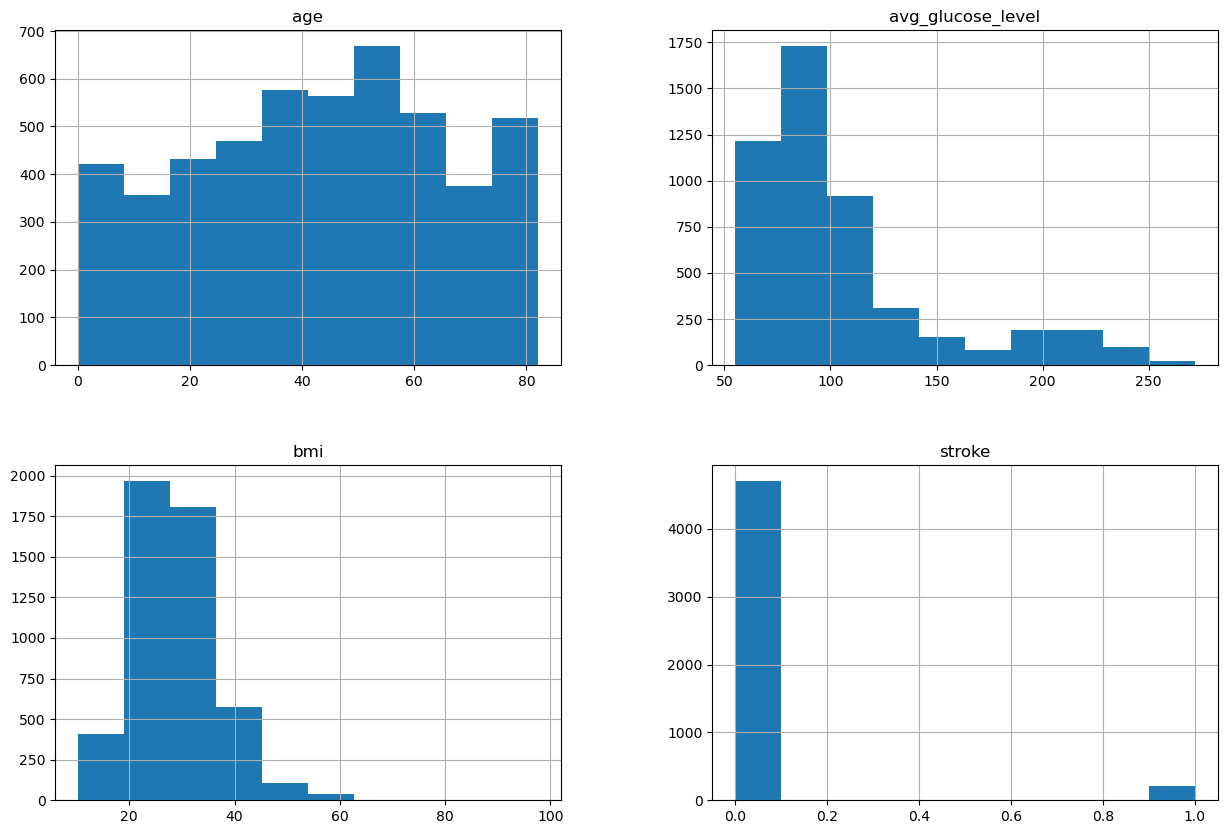

In [70]:
no_na_df.hist(figsize=(15, 10))

This dataset does include children, will be interesting later on to separate children (under 18 y/o) and compare data to adults (over 18 y/o)

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.235838,0.333398,0.232331
avg_glucose_level,0.235838,1.000000,0.175502,0.138936
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.232331,0.138936,0.042374,1.000000


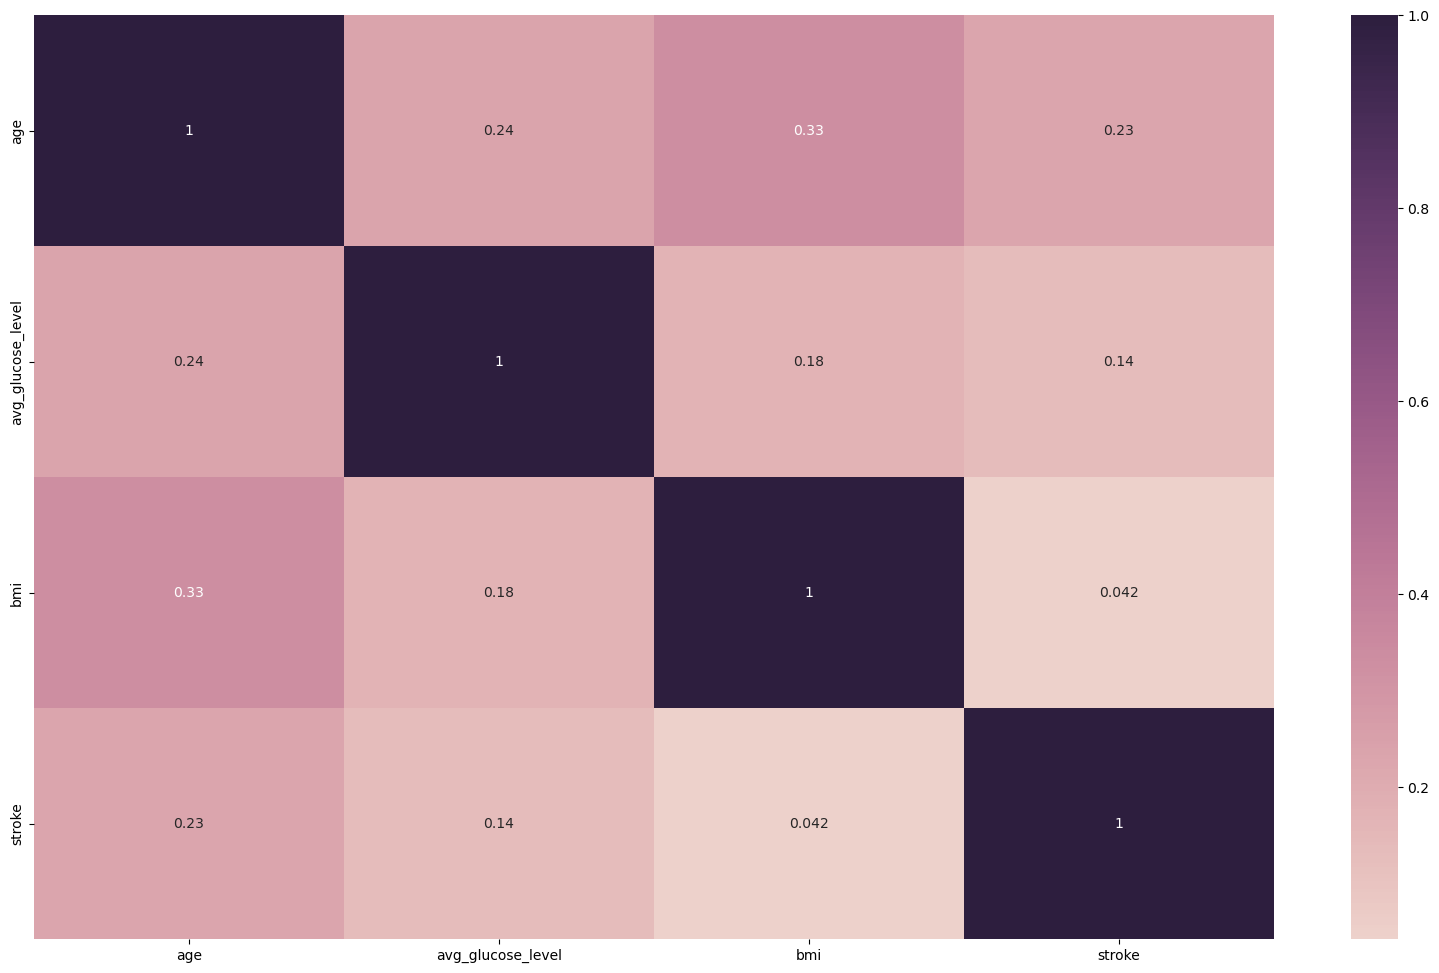

In [72]:
# heatmap plot
sns.heatmap(no_na_df.corr(), 
            annot=True, 
            cmap=sns.cubehelix_palette(as_cmap=True))

# tabular corr matrix
no_na_df.corr()


Age seems to be the factor correlating to stroke the most in this dataset, with hypertension, heart disease, and glucose lvl all similarly to variance

#### Encoding and scaling data

In [73]:
no_na_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [86]:
# Print unique values for categorical variables
for col in no_na_df:
    if no_na_df[col].dtype == 'O':
        print(f"{col} - {no_na_df[col].unique()}")

gender - ['Male' 'Female' 'Other']
hypertension - ['No' 'Yes']
heart_disease - ['Yes' 'No']
ever_married - ['Yes' 'No']
work_type - ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type - ['Urban' 'Rural']
smoking_status - ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [77]:
# Encode categorical data using one-hot encoding

OHE_data = pd.get_dummies(no_na_df, columns=["gender","hypertension", "heart_disease", "ever_married","work_type", "Residence_type", "smoking_status"])
OHE_data

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_No,hypertension_Yes,heart_disease_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,186.21,29.0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,103.08,18.6,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,125.20,40.0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.6,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.6,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [91]:
# Split data into target and features

y = OHE_data['stroke']
X = OHE_data.drop("stroke", axis=1)
X.shape, y.shape

((4909, 23), (4909,))

In [92]:
# Scale data
from sklearn.preprocessing import StandardScaler

# instantiate StandardScalar
sc = StandardScaler()

# Fit scaler to data
sc.fit(X)

# transform data 
scaled_data = sc.transform(X)

### SVC Model 

In [89]:
from sklearn.svm import SVC

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3927, 23), (982, 23), (3927,), (982,))